In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from pandas.api.types import CategoricalDtype
from pandas_profiling import ProfileReport


In [3]:
df = pd.read_csv("zomato.csv", index_col = 0, na_values = ["###","??"])

In [4]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
url,,,,,,,,,,,,,,,,
https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsMTgzODI5NDQsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
https://www.zomato.com/bangalore/grand-village-basavanagudi?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsIjE4MzgyOTQ0IiwxODIyNDY3NiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 16)

In [6]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
df.shape

(49440, 16)

In [12]:
df['rate'].value_counts(normalize = True)

3.9    0.095332
3.8    0.092956
3.7    0.091708
3.6    0.079587
4.0    0.076395
4.1    0.070755
3.5    0.066819
3.4    0.059426
3.3    0.055442
4.2    0.052418
3.2    0.044954
4.3    0.040634
3.1    0.037465
4.4    0.027529
3.0    0.024553
2.9    0.019249
4.5    0.015745
2.8    0.014401
2.7    0.007368
4.6    0.007200
2.6    0.006240
4.7    0.004008
2.5    0.002424
2.4    0.001680
4.8    0.001584
4.9    0.001320
2.3    0.001224
2.2    0.000624
2.1    0.000576
2.0    0.000264
1.8    0.000120
Name: rate, dtype: float64

In [13]:
#sn.barplot(df['rate'].value_counts(normalize = True))

<AxesSubplot:>

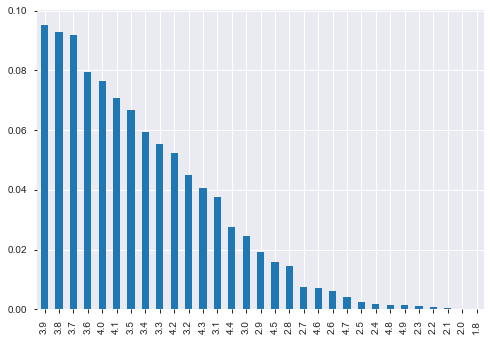

In [14]:
df['rate'].value_counts(normalize = True).plot.bar()

highest rating is nearly to 4 out of 5.

In [15]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1190
location                          21
rest_type                        225
dish_liked                     25948
cuisines                          45
approx_cost(for two people)      341
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
df.isna().sum()/len(df)*100

address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.726133
votes                           0.000000
phone                           2.406958
location                        0.042476
rest_type                       0.455097
dish_liked                     52.483819
cuisines                        0.091019
approx_cost(for two people)     0.689725
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [17]:
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

In [18]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49440 non-null  object 
 1   name          49440 non-null  object 
 2   online_order  49440 non-null  object 
 3   book_table    49440 non-null  object 
 4   rate          41665 non-null  float64
 5   votes         49440 non-null  int64  
 6   phone         48250 non-null  object 
 7   location      49419 non-null  object 
 8   rest_type     49215 non-null  object 
 9   dish_liked    23492 non-null  object 
 10  cuisines      49395 non-null  object 
 11  cost          49099 non-null  float64
 12  reviews_list  49440 non-null  object 
 13  menu_item     49440 non-null  object 
 14  type          49440 non-null  object 
 15  city          49440 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 6.0+ MB


# visualization

Text(0.5, 0, 'Number of outlets')

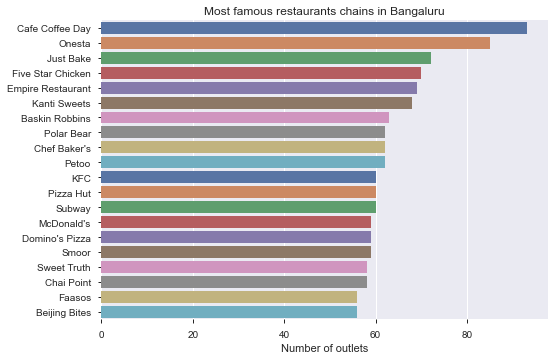

In [20]:
# top chain restaurent in bangaluru
chains=df['name'].value_counts()[0:20]
sn.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

In [21]:
df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [22]:
from collections import Counter


Text(0.5, 0, 'count')

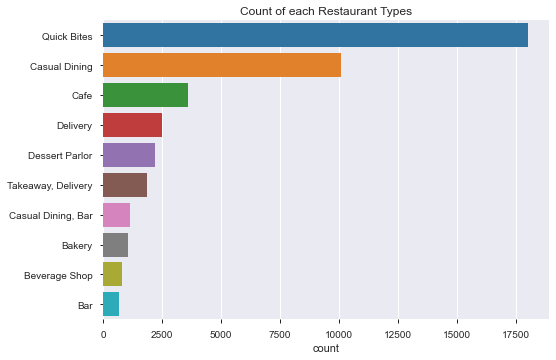

In [23]:
r_type=df['rest_type'].value_counts()[:10]    #top 10 types of restaurent
sn.barplot(x=r_type,y=r_type.index)
plt.title("Count of each Restaurant Types")
plt.xlabel("count")

Text(0.5, 0, 'count')

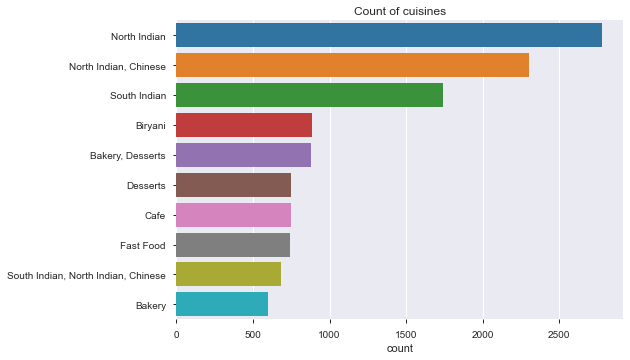

In [24]:
cuisines=df['cuisines'].value_counts()[:10]
sn.barplot(x=cuisines,y=cuisines.index)
plt.title("Count of cuisines")
plt.xlabel("count")

Text(0.5, 0, 'count')

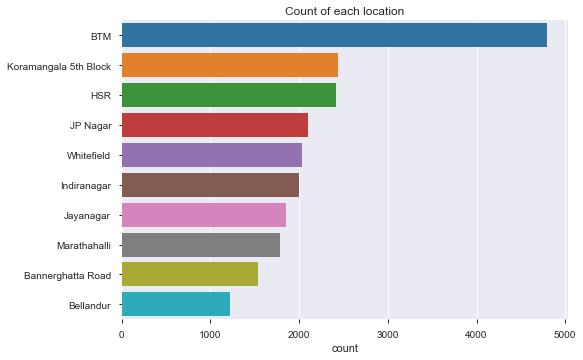

In [25]:
location=df['location'].value_counts()[:10]  
sn.barplot(x=location,y=location.index)
plt.title("Count of each location")
plt.xlabel("count")

In [26]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore              [FreshMenu, Fit Dish Fetish, The B2B Cart]
Whitefield           [Imperio Cafe, Night Diaries, AB's - Absolute ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 93, dtype: object

In [27]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [28]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,336
Jayanagar,344
Bannerghatta Road,424
JP Nagar,484
Indiranagar,501
Electronic City,616
Marathahalli,632
HSR,650
BTM,672


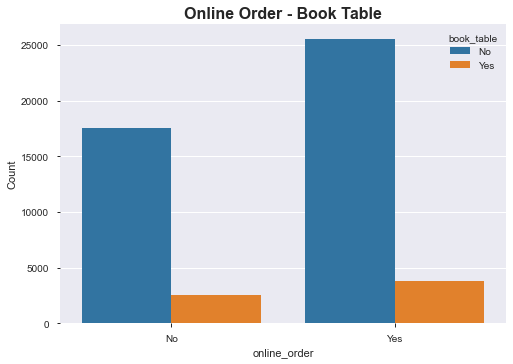

In [29]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
sn.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=16, fontweight='bold')
plt.show()

Statement: Maximum restaurants provide online ordering but not table booking facility. The number of restaurants providing table booking facility but not online order is the least. around 17000 restaurants don't provide online ordering as well as table booking facility.

So in case we are planning to start a restaurant with havig business meeting type then online order and table booking system should be available, cause of they haivng perfect time for their meet. 



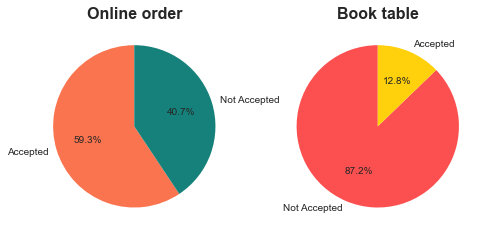

In [30]:
label1 = ["Accepted",'Not Accepted']
label2 = ['Not Accepted', "Accepted"]
df_online = df['online_order'].value_counts().values
df_table = df['book_table'].value_counts().values
fig, ax1 = plt.subplots(nrows=1, ncols=2)

color1 = ['#FA744F', '#16817A']
color2 = ['#FC5050', '#FFD00C']

ax1[0].pie(df_online, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Online order', fontsize=16, fontweight='bold')

ax1[1].pie(df_table, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Book table', fontsize=16, fontweight='bold')
plt.show()

Observation: 59.3% of the restaurants accept online order and 40.7% don't. Only 12.8% of the restaurants provide table booking facility whereas 87.2% don't.

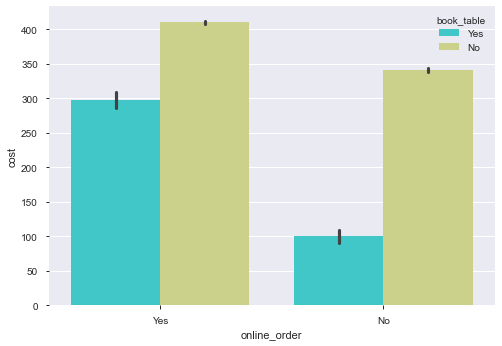

In [31]:
sn.barplot(data=df, x='online_order', y='cost', hue='book_table', palette='rainbow')
plt.show()

Statement: Restaurants which don't accept online orders but provide table booking have the highest approx_cost value above Rs 1000, whereas restaurants which accept online orders and provide table booking have an approx_cost near Rs 700. Restaurants which don't provide table booking have an approx_cost of Rs 400.

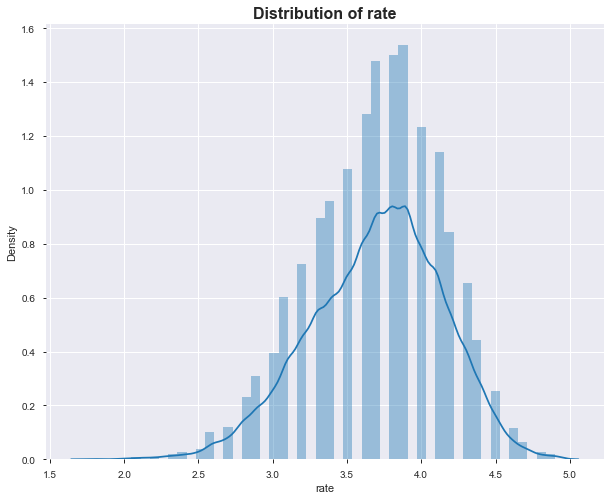

In [32]:
plt.figure(figsize = (10, 8))
sn.distplot(df['rate'])
plt.title("Distribution of rate", fontsize=16, fontweight='bold')
plt.show()

Statement: More than 50 percent of restaurants have rating between 3 and 4. Restaurants having rating more than 4.5 and less than 2.5 are very rare.

In [33]:
df["cost"]

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
49435      1.5
49436    600.0
49437      2.0
49438      2.5
49439      1.5
Name: cost, Length: 49440, dtype: float64

In [34]:
df['cost'].sort_values(ascending = False)

46107    950.0
14105    950.0
3395     950.0
19875    950.0
18293    950.0
         ...  
48681      NaN
48969      NaN
48983      NaN
49006      NaN
49364      NaN
Name: cost, Length: 49440, dtype: float64

# cost differ with a change in location

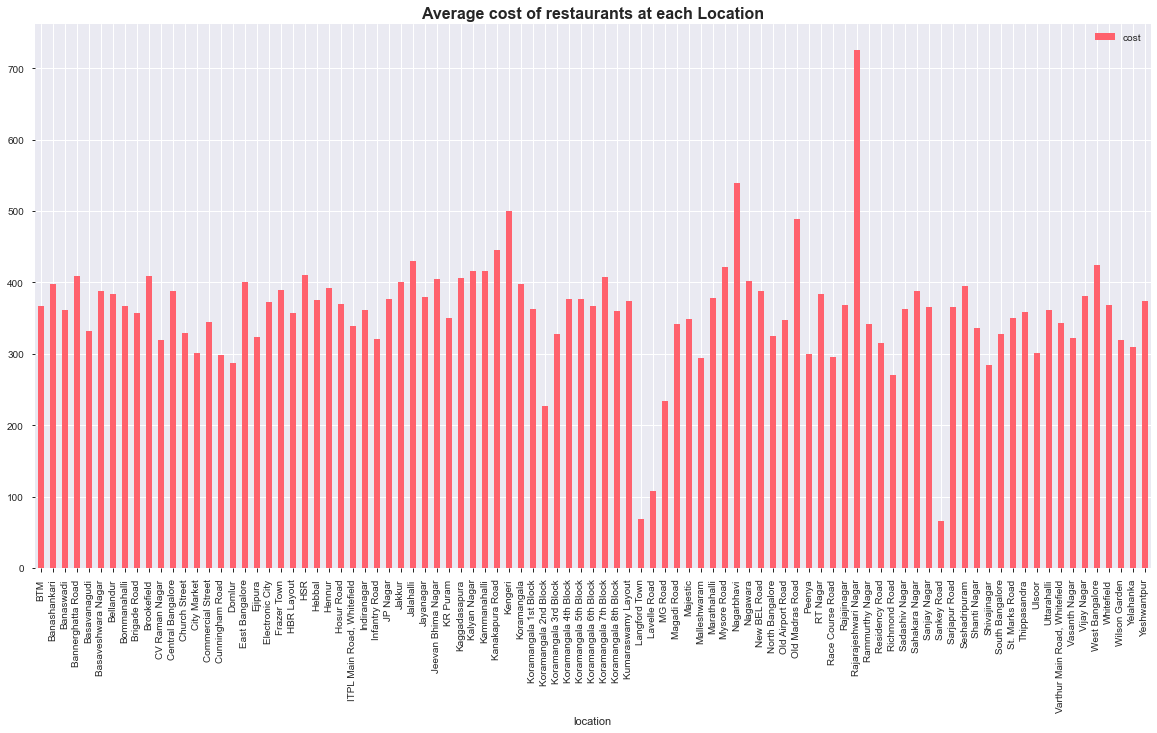

In [35]:
a = df.groupby('location').agg({'cost':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Average cost of restaurants at each Location', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [36]:
a.sort_values("cost", ascending=False)

,cost
location,
Rajarajeshwari Nagar,725.000000
Nagarbhavi,538.888889
Kengeri,500.000000
Old Madras Road,488.636364
Kanakapura Road,444.815789
...,...
MG Road,234.076640
Koramangala 2nd Block,227.207216
Lavelle Road,107.385127


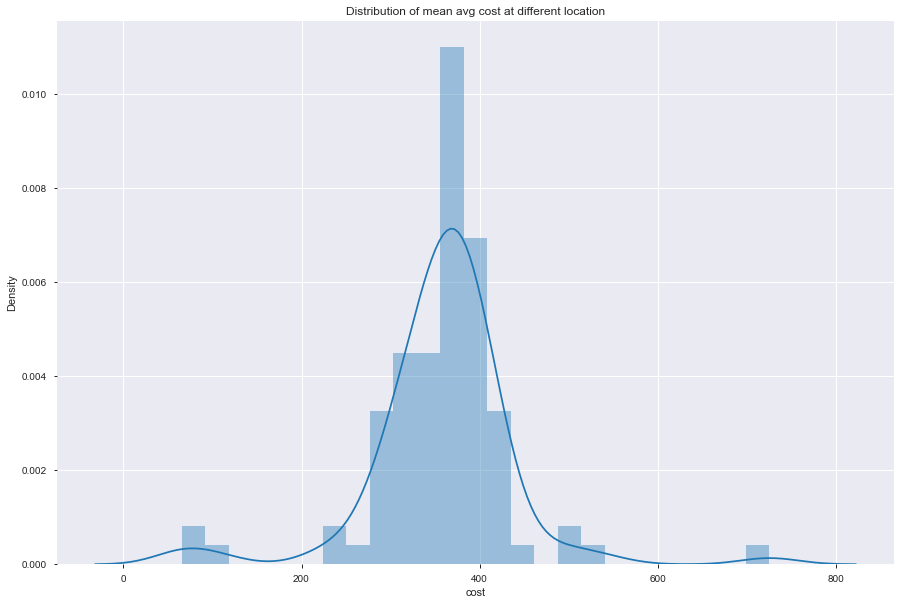

In [37]:
plt.figure(figsize=(15,10))
plt.title("Distribution of mean avg cost at different location")
sn.distplot(a["cost"]);

Statement: Most of the restaurants have cost between Rs. 400 and Rs. Depending on our budget one can select the location.

In [38]:
df["votes"] 

0        775
1        787
2        918
3         88
4        166
        ... 
49435     27
49436      0
49437      0
49438    236
49439     13
Name: votes, Length: 49440, dtype: int64

In [39]:
df['votes'].sort_values(ascending = False)

47831    16832
47411    16832
46972    16832
4645     16345
3691     16345
         ...  
43316        0
43315        0
43314        0
43313        0
19610        0
Name: votes, Length: 49440, dtype: int64

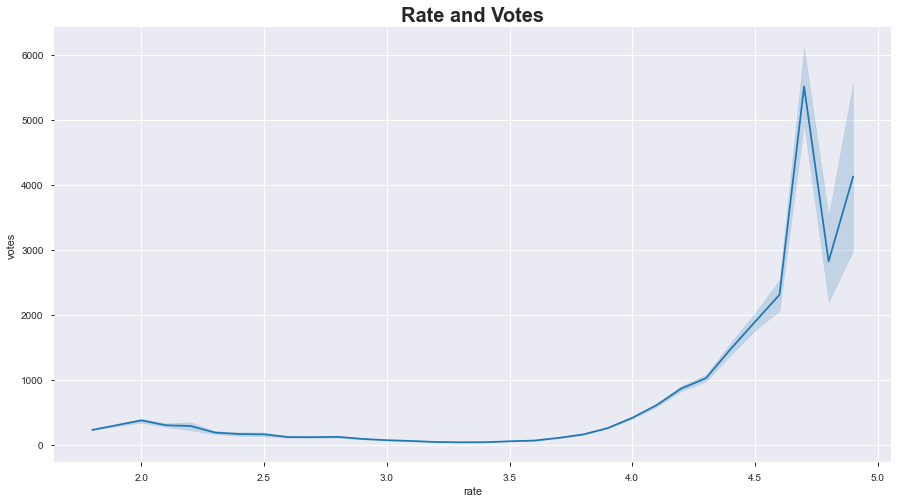

In [40]:
plt.figure(figsize=(15,8))
sn.lineplot(x='rate', y='votes', data=df)
plt.title('Rate and Votes', fontsize=20, fontweight='bold')
plt.show()

Statement:- The line plot indicates that for ratings greater than 4.0 the number of votes is more and for less ratings the number of votes are less. Hence, restaurants with high rating also have high votes.

In [41]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [42]:
df.describe()

,rate,votes,cost
count,41665.000000,49440.000000,49099.000000
mean,3.700449,296.763451,361.297400
std,0.440513,819.779986,231.111464
min,1.800000,0.000000,1.000000
25%,3.400000,9.000000,200.000000
50%,3.700000,47.000000,350.000000
75%,4.000000,212.000000,500.000000
max,4.900000,16832.000000,950.000000


In [43]:
df1 = df.copy(deep = True)  #changes in df1 is not reflacte to original df

In [44]:
df1['rate'].fillna(df1['rate'].mean(),inplace = True)

In [45]:
#df.isna().sum(), df1.isna().sum()

In [46]:
df1 = df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [47]:
df1['cost'].fillna(df['cost'].mean(),inplace = True)

In [48]:
del df1['phone']

In [49]:
df1['dish_liked'].describe

<bound method NDFrame.describe of 0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
49435                                                  NaN
49436                                                  NaN
49437                                                  NaN
49438                         Cocktails, Pizza, Buttermilk
49439                                                  NaN
Name: dish_liked, Length: 49440, dtype: object>

In [50]:
df1['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [51]:
df1['dish_liked'].value_counts()

Biryani                                                                              180
Friendly Staff                                                                        68
Waffles                                                                               67
Chicken Biryani                                                                       66
Paratha                                                                               56
                                                                                    ... 
Mocktails, Cocktails, Pasta, Tacos, Beer, Pizza, Chicken Tikka Masala                  1
Burgers, Chicken Burger, Chips, Veg Burger                                             1
Poha, Burgers, Maggi, Sandwiches, Cheese Burger, Aloo Sandwich                         1
Dhokla, Tea, Lassi, Tiranga Paratha, Sandwich, Pizza Parantha, Rasgulla                1
Butter Chicken, Dal Makhani, Brownie Chocolate, Sandwiches, Salad, Paratha, Rajma      1
Name: dish_liked, Len

In [52]:
df1['dish_liked'].fillna(df1['dish_liked'].value_counts().index[0],inplace = True)

In [53]:
df1['dish_liked'].value_counts()

Biryani                                                                              26128
Friendly Staff                                                                          68
Waffles                                                                                 67
Chicken Biryani                                                                         66
Masala Dosa                                                                             56
                                                                                     ...  
Mocktails, Cocktails, Pasta, Tacos, Beer, Pizza, Chicken Tikka Masala                    1
Burgers, Chicken Burger, Chips, Veg Burger                                               1
Poha, Burgers, Maggi, Sandwiches, Cheese Burger, Aloo Sandwich                           1
Dhokla, Tea, Lassi, Tiranga Paratha, Sandwich, Pizza Parantha, Rasgulla                  1
Butter Chicken, Dal Makhani, Brownie Chocolate, Sandwiches, Salad, Paratha, Rajma        1

In [54]:
df1['rest_type'].value_counts()

Quick Bites                   18003
Casual Dining                 10066
Cafe                           3610
Delivery                       2493
Dessert Parlor                 2188
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [55]:
df1['rest_type'].fillna(df1['rest_type'].value_counts().index[0],inplace = True)

In [56]:
df1['location'].fillna(df1['location'].value_counts().index[0],inplace = True)

In [57]:
df1['cuisines'].fillna(df1['cuisines'].value_counts().index[0],inplace = True)

In [58]:
df.isna().sum(), df1.isna().sum()

(address             0
 name                0
 online_order        0
 book_table          0
 rate             7775
 votes               0
 phone            1190
 location           21
 rest_type         225
 dish_liked      25948
 cuisines           45
 cost              341
 reviews_list        0
 menu_item           0
 type                0
 city                0
 dtype: int64,
 address         0
 name            0
 online_order    0
 book_table      0
 rate            0
 votes           0
 location        0
 rest_type       0
 dish_liked      0
 cuisines        0
 cost            0
 reviews_list    0
 menu_item       0
 type            0
 city            0
 dtype: int64)

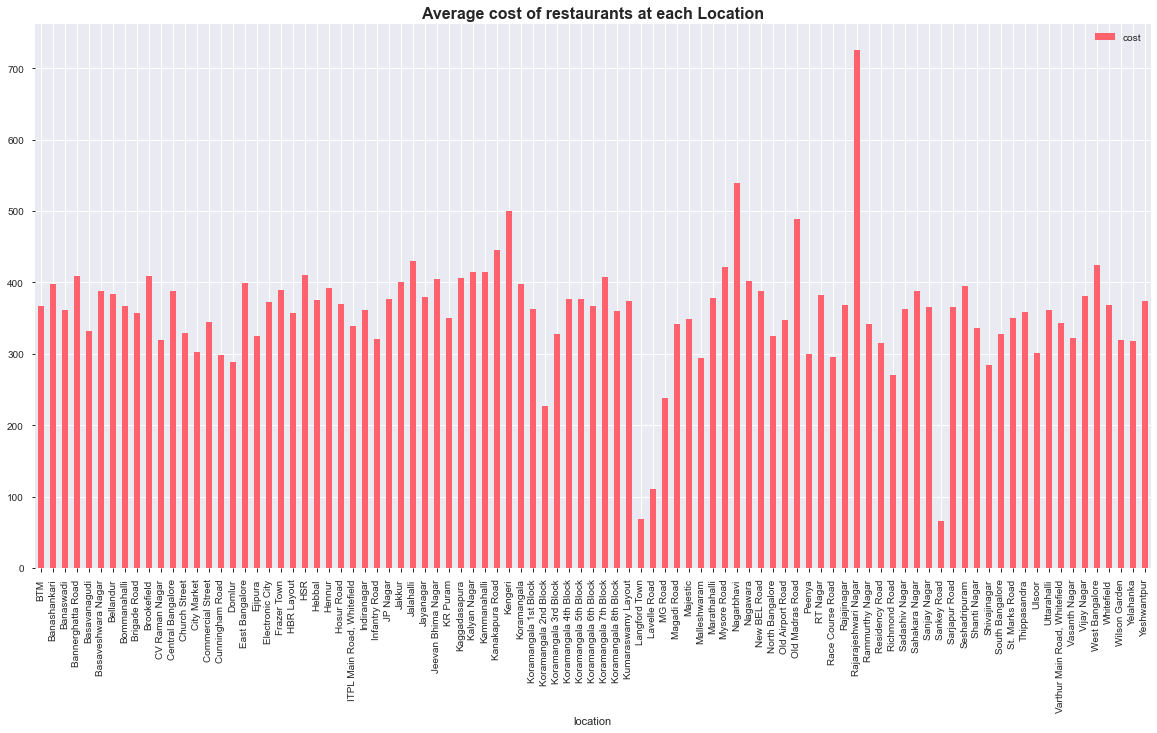

In [59]:
a = df1.groupby('location').agg({'cost':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Average cost of restaurants at each Location', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

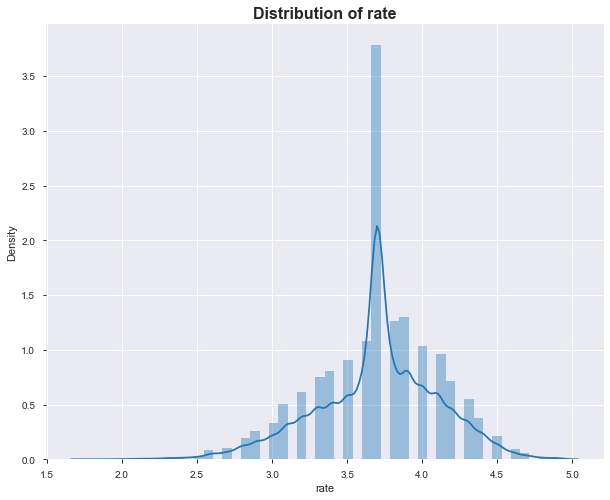

In [60]:
plt.figure(figsize = (10, 8))
sn.distplot(df1['rate'])
plt.title("Distribution of rate", fontsize=16, fontweight='bold')
plt.show()

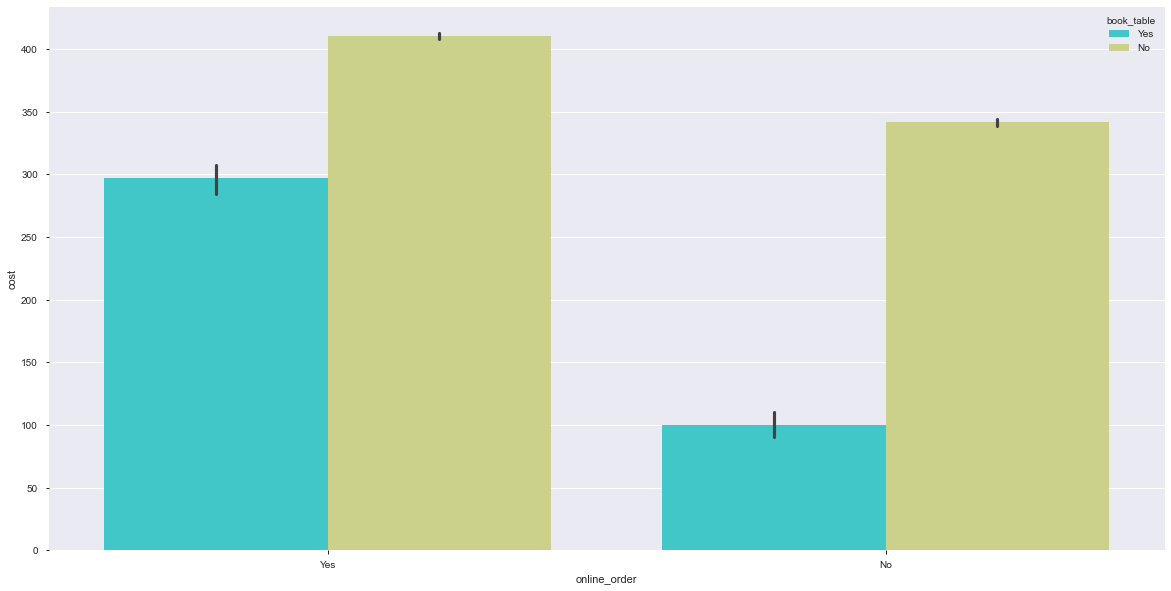

In [61]:
sn.barplot(data=df1, x='online_order', y='cost', hue='book_table', palette='rainbow')
plt.show()

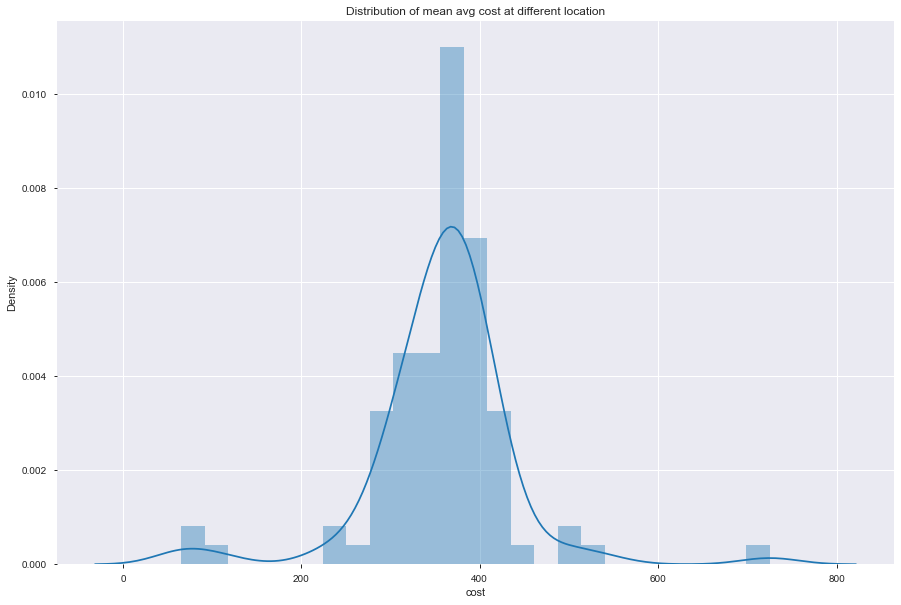

In [62]:
plt.figure(figsize=(15,10))
plt.title("Distribution of mean avg cost at different location")
sn.distplot(a["cost"]);